Q1.
- Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import tsfel
from joblib import Parallel, delayed
from sklearn.metrics import accuracy_score

In [75]:
# Define file paths
axes = ["x", "y", "z"]
file_paths = {axis: f"data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_{axis}_train.txt" for axis in axes}

# Load data for each axis into a dictionary of DataFrames
dfs = {axis: pd.read_csv(file_paths[axis], header=None, delim_whitespace=True) for axis in axes}

# Compute the magnitude of acceleration
# Calculate sqrt(x^2 + y^2 + z^2) for each row
df_acc = pd.DataFrame(np.sqrt(dfs['x']**2 + dfs['y']**2 + dfs['z']**2))

# Optionally, save to a CSV file
df_acc.to_csv("combined_total_acceleration.csv", index=False, header=False)

# Load the combined acceleration magnitude data for training
df_train_acc = pd.read_csv("data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/__MACOSX/UCI HAR Dataset/train/Inertial Signals/combined_total_acceleration.csv", header=None)
# Load the labels for training data
y_train = pd.read_csv("data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", header=None)


C:\Users\SIDDHARTH\AppData\Local\Temp\ipykernel_12524\534280910.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfs = {axis: pd.read_csv(file_paths[axis], header=None, delim_whitespace=True) for axis in axes}
C:\Users\SIDDHARTH\AppData\Local\Temp\ipykernel_12524\534280910.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfs = {axis: pd.read_csv(file_paths[axis], header=None, delim_whitespace=True) for axis in axes}
C:\Users\SIDDHARTH\AppData\Local\Temp\ipykernel_12524\534280910.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfs = {axis: pd.read_csv(file_paths[axis], header=None, delim_whitespace=True) for axis in axes}


In [60]:
# df_acc

In [61]:
# Load the combined acceleration magnitude data for testing (repeat the magnitude calculation process for test data)
axes = ["x", "y", "z"]
file_paths_test = {axis: f"data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_{axis}_test.txt" for axis in axes}

# Load data for each axis into a dictionary of DataFrames for the test set
dfs_test = {axis: pd.read_csv(file_paths_test[axis], header=None, delim_whitespace=True) for axis in axes}

# Compute the magnitude of acceleration for the test set
df_test_acc = pd.DataFrame(np.sqrt(dfs_test['x']**2 + dfs_test['y']**2 + dfs_test['z']**2))

# Load the labels for the test data
y_test = pd.read_csv("data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", header=None)


C:\Users\SIDDHARTH\AppData\Local\Temp\ipykernel_12524\3391091943.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfs_test = {axis: pd.read_csv(file_paths_test[axis], header=None, delim_whitespace=True) for axis in axes}
C:\Users\SIDDHARTH\AppData\Local\Temp\ipykernel_12524\3391091943.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfs_test = {axis: pd.read_csv(file_paths_test[axis], header=None, delim_whitespace=True) for axis in axes}
C:\Users\SIDDHARTH\AppData\Local\Temp\ipykernel_12524\3391091943.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfs_test = {axis: pd.read_csv(file_paths_test[axis], header=None, delim_whitespace=True) for axis in axes}


In [76]:
# Train a Decision Tree model
model = DecisionTreeClassifier()
model.fit(df_train_acc, y_train)

# Predict the labels for the test set
y_pred = model.predict(df_test_acc)

In [77]:
# Calculate accuracy, precision, recall, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.6294536817102138
Precision: 0.6324603364709853
Recall: 0.6294536817102138
Confusion Matrix:
[[348  86  45   7   5   5]
 [140 256  65   6   2   2]
 [ 61 115 238   0   2   4]
 [  1   0   0 242 132 116]
 [  3   1   0 114 398  16]
 [  2   5   0 151   6 373]]

Classification Report:
              precision    recall  f1-score   support

           1       0.63      0.70      0.66       496
           2       0.55      0.54      0.55       471
           3       0.68      0.57      0.62       420
           4       0.47      0.49      0.48       491
           5       0.73      0.75      0.74       532
           6       0.72      0.69      0.71       537

    accuracy                           0.63      2947
   macro avg       0.63      0.62      0.63      2947
weighted avg       0.63      0.63      0.63      2947



- Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import tsfel
import pandas as pd
from joblib import Parallel, delayed
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [65]:
# Load the labels for training and testing data
y_train = pd.read_csv("data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", header=None)
y_test = pd.read_csv("data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", header=None)

# Load and compute the magnitude of acceleration for training data
axes = ["x", "y", "z"]
file_paths_train = {axis: f"data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_{axis}_train.txt" for axis in axes}
dfs_train = {axis: pd.read_csv(file_paths_train[axis], header=None, delim_whitespace=True) for axis in axes}
df_train_acc = pd.DataFrame(np.sqrt(dfs_train['x']**2 + dfs_train['y']**2 + dfs_train['z']**2))

# Load and compute the magnitude of acceleration for testing data
file_paths_test = {axis: f"data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_{axis}_test.txt" for axis in axes}
dfs_test = {axis: pd.read_csv(file_paths_test[axis], header=None, delim_whitespace=True) for axis in axes}
df_test_acc = pd.DataFrame(np.sqrt(dfs_test['x']**2 + dfs_test['y']**2 + dfs_test['z']**2))

# Retrieves a pre-defined feature configuration file to extract all available features
cfg = tsfel.get_features_by_domain()

# Function to extract features for a single time series instance
def extract_features_for_instance(row):
    return tsfel.time_series_features_extractor(cfg, row)

# Parallel processing: Extract features for each row in parallel
tsfel_train_x = pd.concat(Parallel(n_jobs=-1)(delayed(extract_features_for_instance)(df_train_acc.iloc[i, :]) for i in range(len(df_train_acc))), ignore_index=True)
tsfel_test_x = pd.concat(Parallel(n_jobs=-1)(delayed(extract_features_for_instance)(df_test_acc.iloc[i, :]) for i in range(len(df_test_acc))), ignore_index=True)

C:\Users\SIDDHARTH\AppData\Local\Temp\ipykernel_12524\1533480016.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfs_train = {axis: pd.read_csv(file_paths_train[axis], header=None, delim_whitespace=True) for axis in axes}
C:\Users\SIDDHARTH\AppData\Local\Temp\ipykernel_12524\1533480016.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfs_train = {axis: pd.read_csv(file_paths_train[axis], header=None, delim_whitespace=True) for axis in axes}
C:\Users\SIDDHARTH\AppData\Local\Temp\ipykernel_12524\1533480016.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfs_train = {axis: pd.read_csv(file_paths_train[axis], header=None, delim_whitespace=True) for axis in axes}
C:\Users\SIDDHARTH\AppData\L

In [78]:
# tsfel_train_x.shape

(7352, 198)

In [66]:
# Combine original and TSFEL features
combined_train_x = pd.concat([df_train_acc, tsfel_train_x], axis=1)
combined_test_x = pd.concat([df_test_acc, tsfel_test_x], axis=1)

# Convert all column names to strings to avoid TypeError
combined_train_x.columns = combined_train_x.columns.astype(str)
combined_test_x.columns = combined_test_x.columns.astype(str)

# Train a Decision Tree model
model = DecisionTreeClassifier()
model.fit(combined_train_x, y_train)

# Predict and evaluate
y_pred = model.predict(combined_test_x)
accuracy = accuracy_score(y_test, y_pred)

print(f"Combined Features Accuracy: {accuracy}")


Combined Features Accuracy: 0.7292161520190024


In [79]:
# combined_train_x.shape

(7352, 326)

In [68]:
# Predict and evaluate
y_pred = model.predict(combined_test_x)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Combined Features Accuracy: {accuracy}")
print(f"Combined Features Precision: {precision}")
print(f"Combined Features Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Combined Features Accuracy: 0.7292161520190024
Combined Features Precision: 0.7313360146542928
Combined Features Recall: 0.7292161520190024
Confusion Matrix:
[[448  28  20   0   0   0]
 [103 303  65   0   0   0]
 [ 22  91 307   0   0   0]
 [  0   0   0 287 121  83]
 [  0   0   0 106 404  22]
 [  0   0   0 136   1 400]]

Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.90      0.84       496
           2       0.72      0.64      0.68       471
           3       0.78      0.73      0.76       420
           4       0.54      0.58      0.56       491
           5       0.77      0.76      0.76       532
           6       0.79      0.74      0.77       537

    accuracy                           0.73      2947
   macro avg       0.73      0.73      0.73      2947
weighted avg       0.73      0.73      0.73      2947



- Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.


In [69]:
import pandas as pd

# Reading the data from the text file into a pandas DataFrame
X_train = pd.read_csv(
    'data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt',
    sep='\s+', # white space as delimiter
    header=None  # No header row in the file
)

# Display the first few rows of the DataFrame
print("X shape: ",X_train.shape)

y_train=pd.read_csv(
    'data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt',
    header=None
)



print("y shape: ",y_train.shape)


X shape:  (7352, 561)
y shape:  (7352, 1)


In [70]:
X_test = pd.read_csv(
    'data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt',
    sep='\s+', # white space as delimiter
    header=None  # No header row in the file
)

y_test=pd.read_csv(
    'data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt',
    header=None
)

print("X test shape: ",X_test.shape)
print("y test shape: ",y_test.shape)

X test shape:  (2947, 561)
y test shape:  (2947, 1)


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [72]:
y_pred=clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8635900916185952
Precision: 0.864224814212295
Recall: 0.8635900916185952
Confusion Matrix:
[[448  27  21   0   0   0]
 [ 66 374  31   0   0   0]
 [ 16  48 356   0   0   0]
 [  0   0   0 372 119   0]
 [  0   0   0  74 458   0]
 [  0   0   0   0   0 537]]


Q-2


In [73]:
import matplotlib.pyplot as plt

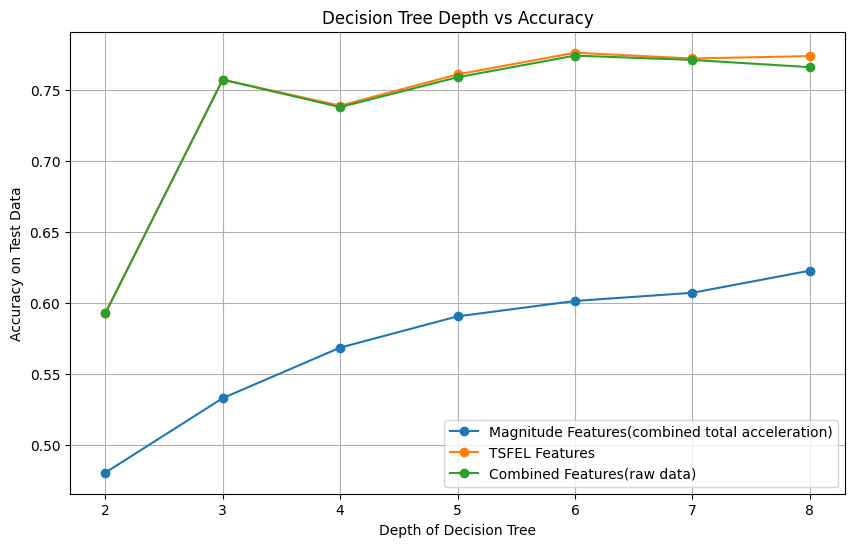

In [74]:
# Function to train and evaluate Decision Tree with varying depths
def evaluate_tree_depths(train_x, test_x, y_train, y_test):
    depths = range(2, 9)
    accuracies = []

    for depth in depths:
        model = DecisionTreeClassifier(max_depth=depth)
        model.fit(train_x, y_train)
        y_pred = model.predict(test_x)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    return depths, accuracies

# Train and evaluate for original magnitude data
depths_magnitude, accuracies_magnitude = evaluate_tree_depths(df_train_acc, df_test_acc, y_train, y_test)

# Train and evaluate for TSFEL-extracted features
depths_tsfel, accuracies_tsfel = evaluate_tree_depths(tsfel_train_x, tsfel_test_x, y_train, y_test)

# Train and evaluate for combined features
depths_combined, accuracies_combined = evaluate_tree_depths(combined_train_x, combined_test_x, y_train, y_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depths_magnitude, accuracies_magnitude, label='Magnitude Features(combined total acceleration)', marker='o')
plt.plot(depths_tsfel, accuracies_tsfel, label='TSFEL Features', marker='o')
plt.plot(depths_combined, accuracies_combined, label='Combined Features(raw data)', marker='o')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy on Test Data')
plt.title('Decision Tree Depth vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()